In [1]:
#Import functions for analysis
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#Reading cvs file
df = pd.read_csv('duo.csv')

In [3]:
print("Shape:", df.shape)
df.head(10)

Shape: (124, 39)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q12,Q13,Q13_5_TEXT,Q17,Q18,Q18_5_TEXT,Q19,Q19_5_TEXT,Q21,Q18.1
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How well does Duolingo help you when you make ...,Which Duolingo feature do you find most helpfu...,Which Duolingo feature do you find most helpfu...,"On a scale of 1-5, how effective do you think ...",What frustrates you the most about Free Duolin...,What frustrates you the most about Free Duolin...,What features would you be interested in: (Sel...,What features would you be interested in: (Sel...,Are there any User Interface (UI) improvements...,What is your email address? (Optional)
1,"{""ImportId"":""startDate"",""timeZone"":""America/Lo...","{""ImportId"":""endDate"",""timeZone"":""America/Los_...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID13_5_TEXT""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID18_5_TEXT""}","{""ImportId"":""QID19""}","{""ImportId"":""QID19_5_TEXT""}","{""ImportId"":""QID21_TEXT""}","{""ImportId"":""QID25_TEXT""}"
2,2025-03-18 15:50:56,2025-03-18 15:51:38,Survey Preview,NaN,100,42,True,2025-03-18 15:51:38,R_1AZ4Ngn3WJxZO5b,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-18 20:17:44,2025-03-18 20:17:57,Survey Preview,NaN,100,13,True,2025-03-18 20:17:58,R_5HF8FmJgEUZ5MEE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-18 20:26:23,2025-03-18 20:37:47,Survey Preview,NaN,100,683,True,2025-03-18 20:37:48,R_7haxL3AZEDtBNZr,NaN,...,Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,4,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,Nah not really,viduniariyawansa@gmail.com
5,2025-03-19 15:25:17,2025-03-19 15:27:04,IP Address,128.189.252.43,100,106,True,2025-03-19 15:27:04,R_5i8NNGd9Ewvb9I9,NaN,...,Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,3,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,NaN,NaN
6,2025-03-19 15:24:18,2025-03-19 15:28:28,IP Address,24.114.37.236,100,250,True,2025-03-19 15:28:28,R_3VQiytx8wcsCrHf,NaN,...,Very well – it gives targeted explanations and...,"Personalized lesson path (e.g., skill progress...",NaN,5,Repetitive exercises with no real explanations,NaN,AI-generated video explanations for tricky gra...,NaN,Babbel,samairadhir2406@gmail.com
7,2025-03-19 15:30:50,2025-03-19 15:34:20,IP Address,23.16.52.196,100,210,True,2025-03-19 15:34:20,R_19p6XbudceLIdEJ,NaN,...,Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,2,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,When typing in an answer that could also be co...,maheepkainth@gmail.com
8,2025-03-19 15:33:02,2025-03-19 15:34:31,IP Address,70.79.140.50,100,88,True,2025-03-19 15:34:32,R_1IRU5Au7eKz9mk1,NaN,...,Very well – it gives targeted explanations and...,"Personalized lesson path (e.g., skill progress...",NaN,4,Lack of real-world context in sentence examples,NaN,AI-generated video explanations for tricky gra...,NaN,NaN,NaN
9,2025-03-19 15:36:11,2025-03-19 15:38:26,IP Address,128.189.128.86,100,134,True,2025-03-19 15:38:26,R_1j1Gp7NeRu4dX4k,NaN,...,Somewhat – it repeats exercises but doesn’t pr...,Speech recognition and pronunciation feedback,NaN,2,Lack of real-world context in sentence example...,NaN,AI-generated video exp

In [24]:
#Removing unnecessary columns 
df_duo = df.copy()

columns_to_drop = [
    'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
    'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
    'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
    'ExternalReference', 'LocationLatitude', 'LocationLongitude',
    'DistributionChannel', 'UserLanguage', 'Q18.1'
]

df_duo = df_duo.drop(columns = [col for col in columns_to_drop if col in df_duo.columns])

df_duo.head()

,Q1,Q2,Q2.1,Q3,Q4,Q5,Q5_5_TEXT,QID6,Q9,Q9_5_TEXT,...,Q11,Q12,Q13,Q13_5_TEXT,Q17,Q18,Q18_5_TEXT,Q19,Q19_5_TEXT,Q21
0,"Have you ever used Duolingo, or do you current...",Do you use Duolingo Premium (Super Duolingo) o...,What is your age (in years) ?,How many languages do you speak fluently (beyo...,Have you used any other language-learning apps...,What is your primary reason for using Free Duo...,What is your primary reason for using Free Duo...,How often do you use Free Duolingo?,Which language(s) are you learning on Free Duo...,Which language(s) are you learning on Free Duo...,...,Do you feel Duolingo adapts to your individual...,How well does Duolingo help you when you make ...,Which Duolingo feature do you find most helpfu...,Which Duolingo feature do you find most helpfu...,"On a scale of 1-5, how effective do you think ...",What frustrates you the most about Free Duolin...,What frustrates you the most about Free Duolin...,What features would you be interested in: (Sel...,What features would you be interested in: (Sel...,Are there any User Interface (UI) improvements...
1,"{""ImportId"":""QID23""}","{""ImportId"":""QID24""}","{""ImportId"":""QID2_TEXT""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID5_5_TEXT""}","{""ImportId"":""QID6""}","{""ImportId"":""QID9""}","{""ImportId"":""QID9_5_TEXT""}",...,"{""ImportId"":""QID11""}","{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID13_5_TEXT""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID18_5_TEXT""}","{""ImportId"":""QID19""}","{""ImportId"":""QID19_5_TEXT""}","{""ImportId"":""QID21_TEXT""}"
2,NaN,NaN,20,2,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,Free Version,22,2,No,"Travel,Personal interests/Hobby",NaN,I have used it before but I don't use it anymore,Spanish,NaN,...,"No, it feels like a one-size-fits-all experience",Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,4,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,Nah not really


In [25]:
#Rename column names
df_duo = df_duo.rename(columns={
    'Q1': 'uses_duo',
    'Q2': 'free_or_premium',
    'Q2.1': 'age',
    'Q3': 'fluent_lang_num',
    'Q4': 'other_lang_learning_apps',
    'Q5': 'reason',
    'Q5_5_TEXT': 'reason_other',
    'QID6': 'frequency',
    'Q9': 'target_language(s)',
    'Q9_5_TEXT': 'target_language(s)_other',
    'Q10': 'consistency',
    'Q11': 'adapt_individual',
    'Q12': 'adapt_mistakes',
    'Q13': 'best_feature',
    'Q13_5_TEXT': 'best_feature_other',
    'Q17': 'adapt_effectiveness',
    'Q18': 'pain_point',
    'Q18_5_TEXT': 'pain_point_other',
    'Q19': 'potential_improvement',
    'Q19_5_TEXT': 'potential_improvement_other',
    'Q21': 'UI_improvements'
})

df_duo.head()

,uses_duo,free_or_premium,age,fluent_lang_num,other_lang_learning_apps,reason,reason_other,frequency,target_language(s),target_language(s)_other,...,adapt_individual,adapt_mistakes,best_feature,best_feature_other,adapt_effectiveness,pain_point,pain_point_other,potential_improvement,potential_improvement_other,UI_improvements
0,"Have you ever used Duolingo, or do you current...",Do you use Duolingo Premium (Super Duolingo) o...,What is your age (in years) ?,How many languages do you speak fluently (beyo...,Have you used any other language-learning apps...,What is your primary reason for using Free Duo...,What is your primary reason for using Free Duo...,How often do you use Free Duolingo?,Which language(s) are you learning on Free Duo...,Which language(s) are you learning on Free Duo...,...,Do you feel Duolingo adapts to your individual...,How well does Duolingo help you when you make ...,Which Duolingo feature do you find most helpfu...,Which Duolingo feature do you find most helpfu...,"On a scale of 1-5, how effective do you think ...",What frustrates you the most about Free Duolin...,What frustrates you the most about Free Duolin...,What features would you be interested in: (Sel...,What features would you be interested in: (Sel...,Are there any User Interface (UI) improvements...
1,"{""ImportId"":""QID23""}","{""ImportId"":""QID24""}","{""ImportId"":""QID2_TEXT""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID5_5_TEXT""}","{""ImportId"":""QID6""}","{""ImportId"":""QID9""}","{""ImportId"":""QID9_5_TEXT""}",...,"{""ImportId"":""QID11""}","{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID13_5_TEXT""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID18_5_TEXT""}","{""ImportId"":""QID19""}","{""ImportId"":""QID19_5_TEXT""}","{""ImportId"":""QID21_TEXT""}"
2,NaN,NaN,20,2,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,Free Version,22,2,No,"Travel,Personal interests/Hobby",NaN,I have used it before but I don't use it anymore,Spanish,NaN,...,"No, it feels like a one-size-fits-all experience",Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,4,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,Nah not really


In [26]:
#For reference: the exact question asked for each column number
question_texts = df_duo.iloc[0]
question_texts

uses_duo                       Have you ever used Duolingo, or do you current...
free_or_premium                Do you use Duolingo Premium (Super Duolingo) o...
age                                                What is your age (in years) ?
fluent_lang_num                How many languages do you speak fluently (beyo...
other_lang_learning_apps       Have you used any other language-learning apps...
reason                         What is your primary reason for using Free Duo...
reason_other                   What is your primary reason for using Free Duo...
frequency                                    How often do you use Free Duolingo?
target_language(s)             Which language(s) are you learning on Free Duo...
target_language(s)_other       Which language(s) are you learning on Free Duo...
consistency                               How long have you been using Duolingo?
adapt_individual               Do you feel Duolingo adapts to your individual...
adapt_mistakes              

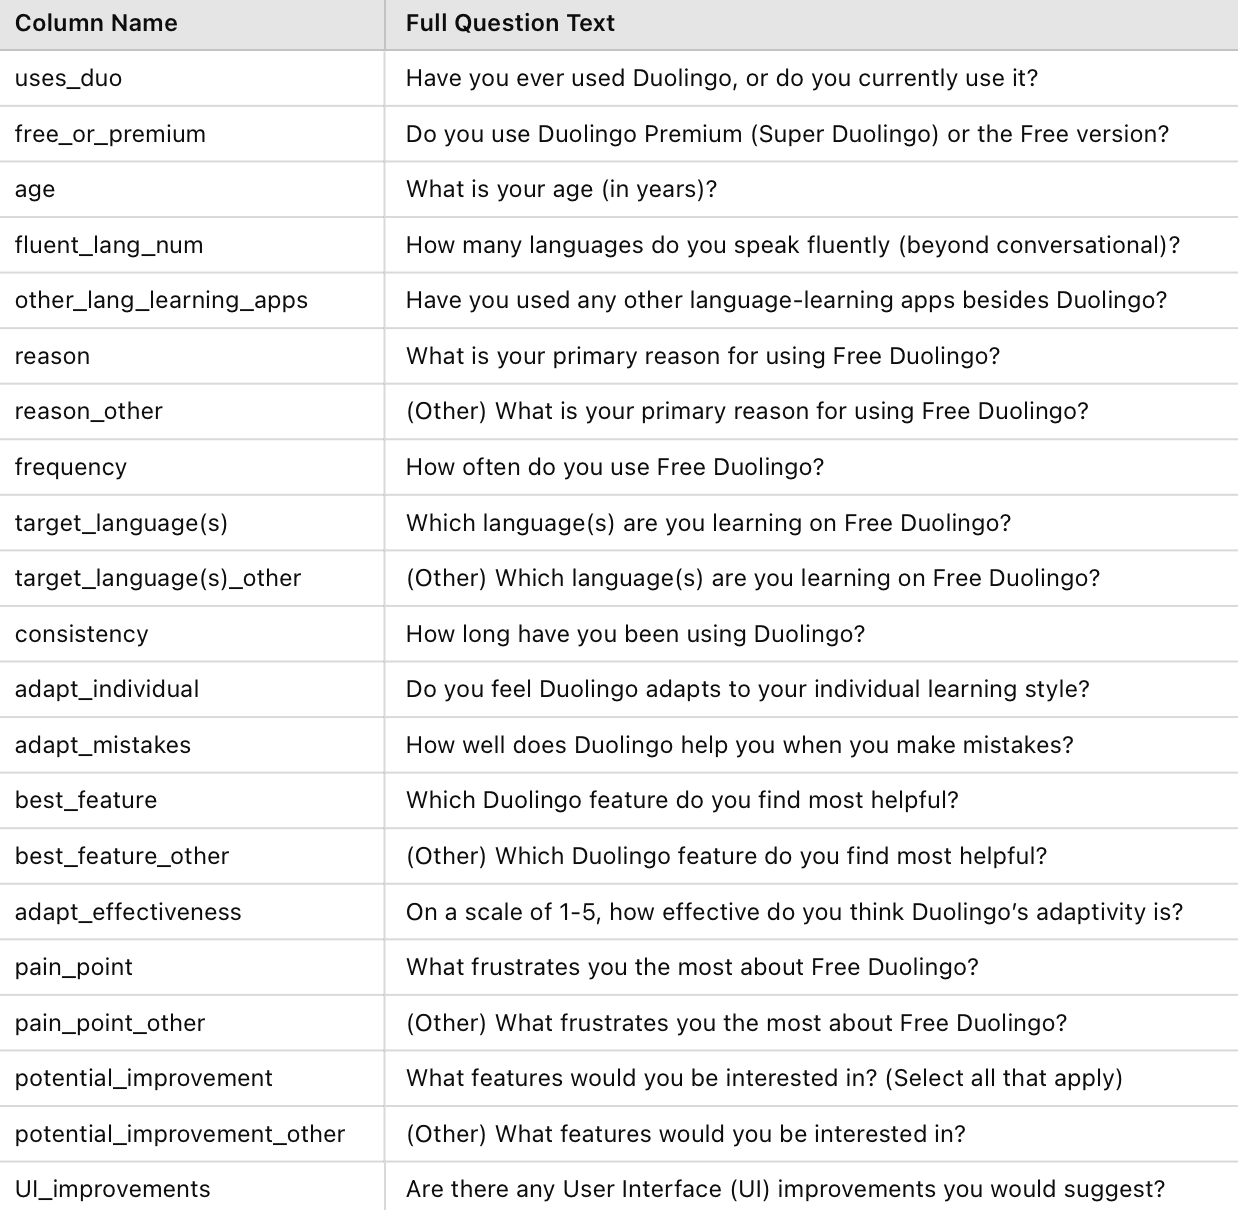

In [33]:
from IPython.display import Image, display

display(Image(filename='question_text.png', width=400))